### ENSO composites for 20CR extremes

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func
from importlib import reload
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xesmf
import cf_xarray
from scipy.stats import pearsonr

In [2]:
# Open HadISST for caculating Nino3.4 index 
hadisst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/hadisstv1.1870_2017.nc')
sst_data = hadisst_ds.sst

In [3]:
# Detrend HadISST data
sst_data_detrend = np.apply_along_axis(func.detrend_2step, 0, sst_data)
sst_detrended = xr.DataArray(sst_data_detrend, coords=sst_data.coords, attrs=sst_data.attrs)

In [4]:
# Nino3.4 index with HadiSSTv1
nino34_region = sst_detrended.sel(latitude=slice(5,-5), longitude=slice(-170,-120))
climatology = nino34_region.sel(time=slice('1950-01','1979-12')).groupby('time.month').mean()
monthly_anomalies = (nino34_region.groupby('time.month')-climatology).mean(dim=['latitude','longitude'])
monthly_anomalies_rolling = monthly_anomalies.rolling(time=5).mean()
sst_std = nino34_region.sel(time=slice('1950-01','1979-12')).std()
nino34_index = monthly_anomalies_rolling.sel(time=slice('1901-6', '2015-5'))/sst_std

In [5]:
# Calculate ENSO years with HadISST
el_nino_years, la_nina_years = func.find_event_years(nino34_index, 0.4, 6)
#offset years for djf and mam
el_nino_years_offset = el_nino_years +1
la_nina_years_offset = la_nina_years +1

### Mean temperature composites 

In [6]:
# Open detrended mean temp anomalies from 20CR 
tmp = xr.open_dataarray('/g/data/w40/rl5183/progress_files/anom.nc', chunks={'member':1}).sel(time=slice('1901-6', '2015-5'))
# Add season year axis 
func.seasonyear(tmp)
# Calculate seasonal means 
seasonal_tmp = tmp.groupby('seasonyear').apply(func.seasonal_mean)

In [7]:
#select out each season
tmp_jja = seasonal_tmp.sel(season='JJA')
tmp_son = seasonal_tmp.sel(season='SON')
tmp_djf = seasonal_tmp.sel(season='DJF')
tmp_mam = seasonal_tmp.sel(season='MAM')
#select out el nino years and minus mean (offset for DJF and MAM)
tmp_jja_el_nino = tmp_jja.sel(seasonyear=el_nino_years) - tmp_jja.mean(dim='seasonyear')
tmp_son_el_nino = tmp_son.sel(seasonyear=el_nino_years) - tmp_son.mean(dim='seasonyear')
tmp_djf_el_nino = tmp_djf.sel(seasonyear=el_nino_years_offset) - tmp_djf.mean(dim='seasonyear')
tmp_mam_el_nino = tmp_mam.sel(seasonyear=el_nino_years_offset) - tmp_mam.mean(dim='seasonyear')
#select out la nina years
tmp_jja_la_nina = tmp_jja.sel(seasonyear=la_nina_years) - tmp_jja.mean(dim='seasonyear')
tmp_son_la_nina = tmp_son.sel(seasonyear=la_nina_years) - tmp_son.mean(dim='seasonyear')
tmp_djf_la_nina = tmp_djf.sel(seasonyear=la_nina_years_offset) - tmp_djf.mean(dim='seasonyear')
tmp_mam_la_nina = tmp_mam.sel(seasonyear=la_nina_years_offset) - tmp_mam.mean(dim='seasonyear')

### TXx composites

In [8]:
TXx = xr.open_dataarray('/g/data/w40/rl5183/progress_files/TXx_detrended.nc', chunks={'member':1}).sel(time=slice('1901-6', '2015-5'))
# Add season year axis 
func.seasonyear(TXx)
# Calculate seasonal means 
seasonal_TXx = TXx.groupby('seasonyear').apply(func.seasonal_max)

In [9]:
#select out each season
TXx_jja = seasonal_TXx.sel(season='JJA')
TXx_son = seasonal_TXx.sel(season='SON')
TXx_djf = seasonal_TXx.sel(season='DJF')
TXx_mam = seasonal_TXx.sel(season='MAM')
#select out el nino years and minus mean (offset for DJF and MAM)
TXx_jja_el_nino = TXx_jja.sel(seasonyear=el_nino_years) - TXx_jja.mean(dim='seasonyear')
TXx_son_el_nino = TXx_son.sel(seasonyear=el_nino_years) - TXx_son.mean(dim='seasonyear')
TXx_djf_el_nino = TXx_djf.sel(seasonyear=el_nino_years_offset) - TXx_djf.mean(dim='seasonyear')
TXx_mam_el_nino = TXx_mam.sel(seasonyear=el_nino_years_offset) - TXx_mam.mean(dim='seasonyear')
#select out la nina years
TXx_jja_la_nina = TXx_jja.sel(seasonyear=la_nina_years) - TXx_jja.mean(dim='seasonyear')
TXx_son_la_nina = TXx_son.sel(seasonyear=la_nina_years) - TXx_son.mean(dim='seasonyear')
TXx_djf_la_nina = TXx_djf.sel(seasonyear=la_nina_years_offset) - TXx_djf.mean(dim='seasonyear')
TXx_mam_la_nina = TXx_mam.sel(seasonyear=la_nina_years_offset) - TXx_mam.mean(dim='seasonyear')

### TNn composites 

In [10]:
TNn = xr.open_dataarray('/g/data/w40/rl5183/progress_files/TNn_detrended.nc', chunks={'member':1}).sel(time=slice('1901-6', '2015-5'))
# Add season year axis 
func.seasonyear(TNn)
# Calculate seasonal means 
seasonal_TNn = TNn.groupby('seasonyear').apply(func.seasonal_min)

In [11]:
#select out each season
TNn_jja = seasonal_TNn.sel(season='JJA')
TNn_son = seasonal_TNn.sel(season='SON')
TNn_djf = seasonal_TNn.sel(season='DJF')
TNn_mam = seasonal_TNn.sel(season='MAM')
#select out el nino years and minus mean (offset for DJF and MAM)
TNn_jja_el_nino = TNn_jja.sel(seasonyear=el_nino_years) - TNn_jja.mean(dim='seasonyear')
TNn_son_el_nino = TNn_son.sel(seasonyear=el_nino_years) - TNn_son.mean(dim='seasonyear')
TNn_djf_el_nino = TNn_djf.sel(seasonyear=el_nino_years_offset) - TNn_djf.mean(dim='seasonyear')
TNn_mam_el_nino = TNn_mam.sel(seasonyear=el_nino_years_offset) - TNn_mam.mean(dim='seasonyear')
#select out la nina years
TNn_jja_la_nina = TNn_jja.sel(seasonyear=la_nina_years) - TNn_jja.mean(dim='seasonyear')
TNn_son_la_nina = TNn_son.sel(seasonyear=la_nina_years) - TNn_son.mean(dim='seasonyear')
TNn_djf_la_nina = TNn_djf.sel(seasonyear=la_nina_years_offset) - TNn_djf.mean(dim='seasonyear')
TNn_mam_la_nina = TNn_mam.sel(seasonyear=la_nina_years_offset) - TNn_mam.mean(dim='seasonyear')

### Rregrid tmp 

In [12]:
ds_bnds = tmp.to_dataset().cf.add_bounds(['latitude','longitude'])
sample_bnds = TXx.to_dataset().cf.add_bounds(['latitude','longitude'])

In [13]:
regrid = xesmf.Regridder(ds_bnds, sample_bnds, method='conservative_normed')

In [14]:
tmp_djf_el_nino_rg = regrid(tmp_djf_el_nino)
tmp_djf_la_nina_rg = regrid(tmp_djf_la_nina)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/gufunc.py:458: PerformanceWarning: Increasing number of chunks by factor of 256
  tmp = blockwise(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/gufunc.py:458: PerformanceWarning: Increasing number of chunks by factor of 256
  tmp = blockwise(


### Mean precip composites

In [15]:
# Open precip anomalies from 20CR 
prate = xr.open_dataarray('/g/data/w40/rl5183/progress_files/anom_prate.nc', chunks={'member':1}).sel(time=slice('1901-6', '2015-5'))
# Add season year axis 
func.seasonyear(prate)
# Calculate seasonal means 
seasonal_prate = prate.groupby('seasonyear').apply(func.seasonal_mean)

In [16]:
#select out each season
prate_jja = seasonal_prate.sel(season='JJA')
prate_son = seasonal_prate.sel(season='SON')
prate_djf = seasonal_prate.sel(season='DJF')
prate_mam = seasonal_prate.sel(season='MAM')
#select out el nino years and minus mean (offset for DJF and MAM)
prate_jja_el_nino = prate_jja.sel(seasonyear=el_nino_years) - prate_jja.mean(dim='seasonyear')
prate_son_el_nino = prate_son.sel(seasonyear=el_nino_years) - prate_son.mean(dim='seasonyear')
prate_djf_el_nino = prate_djf.sel(seasonyear=el_nino_years_offset) - prate_djf.mean(dim='seasonyear')
prate_mam_el_nino = prate_mam.sel(seasonyear=el_nino_years_offset) - prate_mam.mean(dim='seasonyear')
#select out la nina years
prate_jja_la_nina = prate_jja.sel(seasonyear=la_nina_years) - prate_jja.mean(dim='seasonyear')
prate_son_la_nina = prate_son.sel(seasonyear=la_nina_years) - prate_son.mean(dim='seasonyear')
prate_djf_la_nina = prate_djf.sel(seasonyear=la_nina_years_offset) - prate_djf.mean(dim='seasonyear')
prate_mam_la_nina = prate_mam.sel(seasonyear=la_nina_years_offset) - prate_mam.mean(dim='seasonyear')

### Rx1day Composites

In [17]:
Rx1 = xr.open_dataarray('/g/data/w40/rl5183/20CR/precip/monthly_Rx1day_all_members_1x1.nc', chunks={'member':1}).sel(time=slice('1901-6', '2015-5'))*86400
# Add season year axis 
func.seasonyear(Rx1)
# Calculate seasonal means 
seasonal_Rx1 = Rx1.groupby('seasonyear').apply(func.seasonal_max)

In [18]:
#select out each season
Rx1_jja = seasonal_Rx1.sel(season='JJA')
Rx1_son = seasonal_Rx1.sel(season='SON')
Rx1_djf = seasonal_Rx1.sel(season='DJF')
Rx1_mam = seasonal_Rx1.sel(season='MAM')
#select out el nino years and minus mean (offset for DJF and MAM)
Rx1_jja_el_nino = Rx1_jja.sel(seasonyear=el_nino_years) - Rx1_jja.mean(dim='seasonyear')
Rx1_son_el_nino = Rx1_son.sel(seasonyear=el_nino_years) - Rx1_son.mean(dim='seasonyear')
Rx1_djf_el_nino = Rx1_djf.sel(seasonyear=el_nino_years_offset) - Rx1_djf.mean(dim='seasonyear')
Rx1_mam_el_nino = Rx1_mam.sel(seasonyear=el_nino_years_offset) - Rx1_mam.mean(dim='seasonyear')
#select out la nina years
Rx1_jja_la_nina = Rx1_jja.sel(seasonyear=la_nina_years) - Rx1_jja.mean(dim='seasonyear')
Rx1_son_la_nina = Rx1_son.sel(seasonyear=la_nina_years) - Rx1_son.mean(dim='seasonyear')
Rx1_djf_la_nina = Rx1_djf.sel(seasonyear=la_nina_years_offset) - Rx1_djf.mean(dim='seasonyear')
Rx1_mam_la_nina = Rx1_mam.sel(seasonyear=la_nina_years_offset) - Rx1_mam.mean(dim='seasonyear')

### Regrip precip

In [22]:
prate_djf_el_nino_rg = regrid(prate_djf_el_nino)
prate_djf_la_nina_rg = regrid(prate_djf_la_nina)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/gufunc.py:458: PerformanceWarning: Increasing number of chunks by factor of 256
  tmp = blockwise(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/gufunc.py:458: PerformanceWarning: Increasing number of chunks by factor of 256
  tmp = blockwise(


### Land mask 

In [25]:
tmp_djf_el_nino_rg

,Array,Chunk
Bytes,1.41 GiB,506.25 kiB
Shape,"(79, 37, 180, 360)","(1, 1, 180, 360)"
Count,337679 Tasks,2923 Chunks
Type,float64,numpy.ndarray


### Sign Corr

In [31]:
tmp_djf_el_nino_rg.mean(dim=['member', 'time']).to_netcdf('tmp_djf_el_nino_comp.nc')
tmp_djf_la_nina_rg.mean(dim=['member', 'time']).to_netcdf('tmp_djf_la_nina_comp.nc')
TXx_djf_el_nino.mean(dim=['member', 'time']).to_netcdf('txx_djf_el_nino_comp.nc')
TXx_djf_la_nina.mean(dim=['member', 'time']).to_netcdf('txx_djf_la_nina_comp.nc')
TNn_djf_el_nino.mean(dim=['member', 'time']).to_netcdf('tnn_djf_el_nino_comp.nc')
TNn_djf_la_nina.mean(dim=['member', 'time']).to_netcdf('tnn_djf_la_nina_comp.nc')
prate_djf_el_nino_rg.mean(dim=['member', 'time']).to_netcdf('prate_djf_el_nino_comp.nc')
prate_djf_la_nina_rg.mean(dim=['member', 'time']).to_netcdf('prate_djf_la_nina_comp.nc')
Rx1_djf_el_nino.mean(dim=['member', 'time']).to_netcdf('rx1_djf_el_nino_comp.nc')
Rx1_djf_la_nina.mean(dim=['member', 'time']).to_netcdf('rx1_djf_la_nina_comp.nc')

In [2]:
# read netcdfs back in 
tmp_djf_el_nino_comp = xr.open_dataarray('tmp_djf_el_nino_comp.nc')
tmp_djf_la_nina_comp = xr.open_dataarray('tmp_djf_la_nina_comp.nc')
txx_djf_el_nino_comp = xr.open_dataarray('txx_djf_el_nino_comp.nc')
txx_djf_la_nina_comp = xr.open_dataarray('txx_djf_la_nina_comp.nc')
tnn_djf_el_nino_comp = xr.open_dataarray('tnn_djf_el_nino_comp.nc')
tnn_djf_la_nina_comp = xr.open_dataarray('tnn_djf_la_nina_comp.nc')
prate_djf_el_nino_comp = xr.open_dataarray('prate_djf_el_nino_comp.nc')
prate_djf_la_nina_comp = xr.open_dataarray('prate_djf_la_nina_comp.nc')
rx1_djf_el_nino_comp = xr.open_dataarray('rx1_djf_el_nino_comp.nc')
rx1_djf_la_nina_comp = xr.open_dataarray('rx1_djf_la_nina_comp.nc')

In [3]:
# Run sign corr func 
tmp_txx_sign_comp_el_nino = func.sign_corr(tmp_djf_el_nino_comp, txx_djf_el_nino_comp)
tmp_txx_sign_comp_la_nina = func.sign_corr(tmp_djf_la_nina_comp, txx_djf_la_nina_comp)
tmp_tnn_sign_comp_el_nino = func.sign_corr(tmp_djf_el_nino_comp, tnn_djf_el_nino_comp)
tmp_tnn_sign_comp_la_nina = func.sign_corr(tmp_djf_la_nina_comp, tnn_djf_la_nina_comp)
prate_rx1_sign_comp_el_nino = func.sign_corr(prate_djf_el_nino_comp, rx1_djf_el_nino_comp)
prate_rx1_sign_comp_la_nina = func.sign_corr(prate_djf_la_nina_comp, rx1_djf_la_nina_comp)

In [7]:
#Create colorbar
import matplotlib as mpl
color_array = ['red', 'blue', 'darkviolet', 'mediumpurple', 'lightgrey']
cmap = mpl.colors.ListedColormap(color_array)
bounds=np.arange(-1,5)
norm=mpl.colors.BoundaryNorm(bounds+0.5, cmap.N)
#Set lats and lons for plotting
lons = tmp_djf_el_nino_comp.lon.values
lats = tmp_djf_el_nino_comp.lat.values

/local/eg3/rl5183/tmp/ipykernel_3808142/1823308914.py:101: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig('sign_comparisons_ENSO_composites_20CR.jpg', bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)
/local/eg3/rl5183/tmp/ipykernel_3808142/1823308914.py:101: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('sign_comparisons_ENSO_composites_20CR.jpg', bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)
/local/eg3/rl5183/tmp/ipykernel_3808142/1823308914.py:1

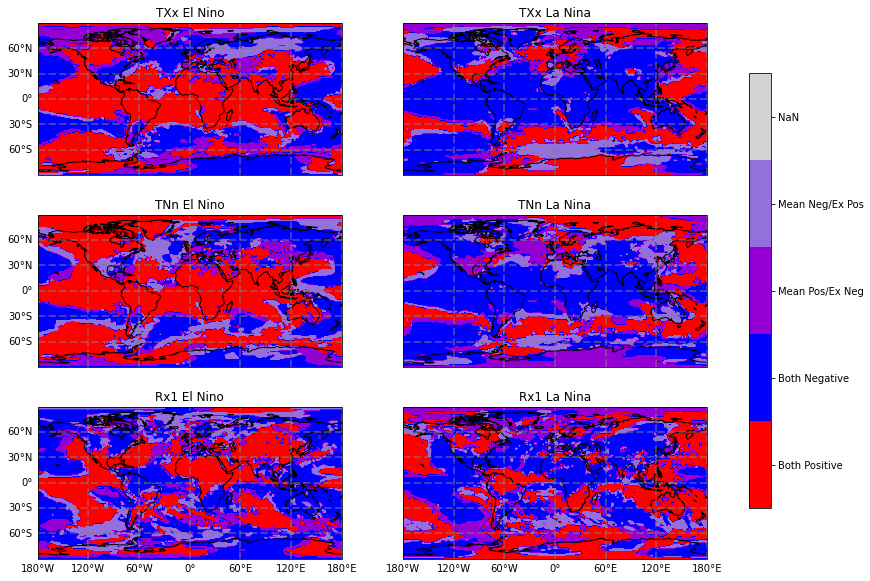

In [12]:
#Plot sign correlations
fig = plt.figure(figsize=(15,10))
axs = []

ax = fig.add_subplot(321, projection=ccrs.PlateCarree())
C = plt.contourf(lons, lats, tmp_txx_sign_comp_el_nino, add_colorbar=False, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
axs.append(ax)
ax.set_title('TXx El Nino')
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(322, projection=ccrs.PlateCarree())
C = plt.contourf(lons, lats, tmp_txx_sign_comp_la_nina, add_colorbar=False, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
axs.append(ax)
ax.set_title('TXx La Nina')
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(323, projection=ccrs.PlateCarree())
C = plt.contourf(lons, lats, tmp_tnn_sign_comp_el_nino, add_colorbar=False, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
axs.append(ax)
ax.set_title('TNn El Nino')
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(324, projection=ccrs.PlateCarree())
C = plt.contourf(lons, lats, tmp_tnn_sign_comp_la_nina, add_colorbar=False, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
axs.append(ax)
ax.set_title('TNn La Nina')
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(325, projection=ccrs.PlateCarree())
C = plt.contourf(lons, lats, prate_rx1_sign_comp_el_nino, add_colorbar=False, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
axs.append(ax)
ax.set_title('Rx1 El Nino')
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(326, projection=ccrs.PlateCarree())
C = plt.contourf(lons, lats, prate_rx1_sign_comp_la_nina, add_colorbar=False, cmap=cmap, norm=norm, levels=bounds+0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
axs.append(ax)
ax.set_title('Rx1 La Nina')
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#colorbar
cbar = plt.colorbar(C, ax=axs, ticks=bounds, shrink=0.8)
cbar.ax.set_yticklabels(['Both Positive', 'Both Negative', 'Mean Pos/Ex Neg', 'Mean Neg/Ex Pos', 'NaN'])

# plt.savefig('sign_comparisons_ENSO_composites_20CR.jpg', bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)